# Homework 3

## Exersice 22

### Answers:
* 


### Solution:


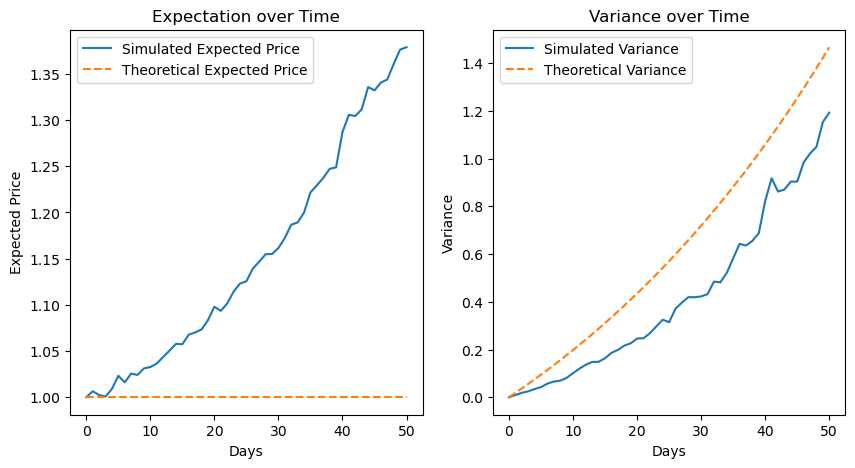

In [1]:
# Python part for exercise 


## Exersice  37

### Answers: 
* The stationary probability vector is $\pi_j=\frac{1}{K}\quad\text{for } j=0,1,\ldots,K-1$

### Solution:

Let $P_{i,j}$ be the probability of state $i$ changing to state $j$

$$
    P_{i,j}=\begin{cases}\frac{1}{6}&\text{if }j=(i+r)\mod K\text{, for }r=1,2,\ldots,6,\\0&\text{otherwise.}\end{cases}
$$

The stationary distribution $\pi_{i,j}$ satisfies the equation:

$$
    \pi_j=\sum_{i=0}^{K-1}\pi_iP_{i,j}\quad\text{for each } j=0,1,\ldots,K-1
$$

Combine the expression of $P_{i,j}$:

$$
    \pi_{j}=\pi_{j-6}\cdot P_{j-6,j}+\pi_{j-5}\cdot P_{j-5,j}+\cdots+\pi_{j}\cdot P_{j,j}
$$

Since the probability of token being at state $j-6$ to $j$ is uniform, so:
$$
    \pi_{j-6} = \pi_{j-5} = \cdots = \pi_j = \frac{1}{k}
$$

substitute:
$$
    \begin{aligned}\pi_{j}&=\pi_{j-6}\cdot P_{j-6,j}+\pi_{j-5}\cdot P_{j-5,j}+\cdots+\pi_{j}\cdot P_{jj}\\&=\frac{1}{k}\times\frac{1}{6}\times 6=\frac{1}{k}\end{aligned}
$$

So the stationary probability vector is $\pi_j=\frac{1}{K}\quad\text{for } j=0,1,\ldots,K-1$

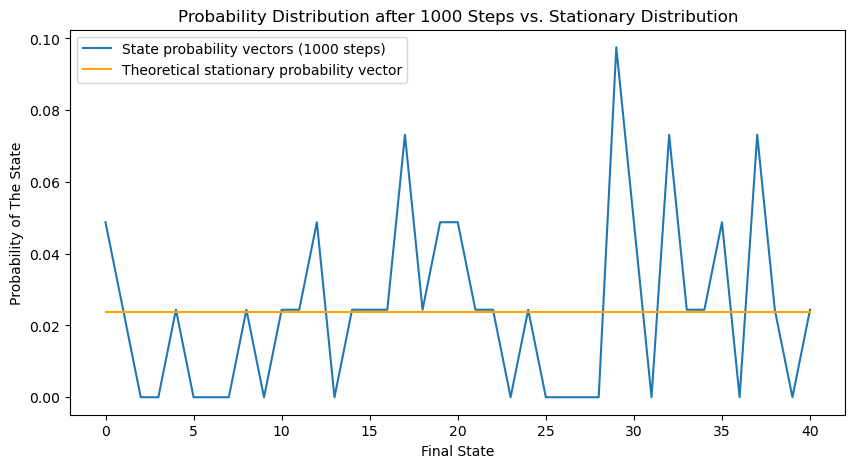

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set up
k = 21
state = np.arange(0, 2*k-1)
step = 10**3

final_state = np.zeros((len(state)))
state_p = np.zeros((len(state)))

# Stimulate
for i in range(len(state)):
    r_list = np.random.choice(
        [1, 2, 3, 4, 5, 6], replace=True, size=step, p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
    )
    r_sum = np.sum(r_list)
    final_state[i] = (state[i]+r_sum) % (2*k-1)


# Calculate distribution
for i in range(len(state)):
    count = np.sum(final_state == i)
    state_p[i] = count / len(final_state)


# Theoretical stationary probability vector
p_th = np.full((len(state)), 1/(2*k))


# plot
plt.figure(figsize=(10, 5))
plt.plot(state, state_p, label="State probability vectors (1000 steps)")
plt.plot(state, p_th, label="Theoretical stationary probability vector",  color='orange')
plt.xlabel('Final State')
plt.ylabel('Probability of The State')
plt.title('Probability Distribution after 1000 Steps vs. Stationary Distribution')
plt.legend()

plt.show()